## Diabetes Prediction Modeling Program

In [75]:
# imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Needed for decision tree visualization
import pydotplus
from IPython.display import Image
from sklearn import tree


### Import Dataset

We found our data on Kaggle at the following [link, found by Alex Teboul](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data). This data set was obtained from the Behavioral Risk Factor Surveillance System (BRFSS), which is a health-related telephone survey that is collected annually by the CDC. It is an annual survey that has been collected since 1984 and the features are either questions asked of participants or variables calculated based on their responses. We will use this dataset to create a machine learning model that predicts based on the given data, whether a person has diabetes or does not

In [76]:
# Import the data (found in \Resources)
diabetes = pd.read_csv("Resources/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

# Head (To view the data)
diabetes.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


## EDA 
Now we will begin diving deeper into our dataset

### Columns

In [77]:
diabetes.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

### Column Descriptions
Below are the detailed descriptions of the columns/features used for the dataset:

1. **Diabetes_binary**: 0 = no diabetes, 1 = prediabetes or diabetes
2. **HighBP**: 0 = no high, BP 1 = high BP
3. **HighChol**: 0 = no high cholesterol, 1 = high cholesterol
4. **CholCheck**: 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years
5. **BMI**: Body Mass Index of the person questioned.
6. **Smoker**: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no, 1 = yes
7. **Stroke**: (Ever) had a stroke; 0 = no, 1 = yes
8. **HeartDiseaseorAttack**: coronary heart disease (CHD) or myocardial infarction (MI); 0 = no, 1 = yes
9. **PhysActivity**: physical activity in past 30 days - not including job; 0 = no, 1 = yes
10. **Fruits**: Consume Fruit 1 or more times per day; 0 = no, 1 = yes
11. **Veggies**: Consume Vegetables 1 or more times per day; 0 = no, 1 = yes
12. **HvyAlcoholConsump**: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no, 1 = yes
13. **AnyHealthcare**: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no, 1 = yes
14. **NoDocbcCost**: "Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?" 0 = no, 1 = yes
15. **GenHlth**: "Would you say that in general your health is?": scale 1-5; 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor
16. **MentHlth**: "Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?" scale 1-30 days
17. **PhysHlth**: "Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?" scale 1-30 days
18. **DiffWalk**: "Do you have serious difficulty walking or climbing stairs?" 0 = no, 1 = yes
19. **Sex**: 0 = female, 1 = male
20. **Age**: 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
    - 1 = Age 18 to 24
    - 2 = Age 25 to 29
    - 3 = Age 30 to 34
    - 4 = Age 35 to 39
    - 5 = Age 40 to 44
    - 6 = Age 45 to 49
    - 7 = Age 50 to 54
    - 8 = Age 55 to 59
    - 9 = Age 60 to 64
    - 10 = Age 65 to 69
    - 11 = Age 70 to 74
    - 12 = Age 75 to 79
    - 13 = Age 80 or older 
21. **Education**: Education Level
    - 1 = Never attended school or only kindergarten
    - 2 = Grades 1 through 8 (Elementary)
    - 3 = Grades 9 through 11 (Some high school)
    - 4 = Grade 12 or GED (High school graduate)
    - 5 = College 1 year to 3 years (Some college or technical school)
    - 6 = College 4 years or more (College graduate)
22. **Income**: Income Scale
    - 1 = Less than $10,000
    - 2 = Less than $15,000 ($10,000 to less than $15,000)
    - 3 = Less than $20,000 ($15,000 to less than $20,000)
    - 4 = Less than $25,000 ($20,000 to less than $25,000)
    - 5 = Less than $35,000 ($25,000 to less than $35,000)
    - 6 = Less than $50,000 ($35,000 to less than $50,000)
    - 7 = Less than $75,000 ($50,000 to less than $75,000)
    - 8 = $75,000 or more





### Describing the dataset at a glance

In [78]:
# Describing the dataset
diabetes.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Getting info about each feature type

In [79]:
# info about the dataset
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

### A Preliminary Correlation Matrix of all the features in the dataset

In [80]:
diabetes.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.381516,0.289213,0.115382,0.293373,0.085999,0.125427,0.211523,-0.158666,-0.054077,...,0.023191,0.040977,0.407612,0.087029,0.213081,0.272646,0.044413,0.278738,-0.170481,-0.224449
HighBP,0.381516,1.000000,0.316515,0.103283,0.241019,0.087438,0.129060,0.210750,-0.136102,-0.040852,...,0.035764,0.026517,0.320540,0.064294,0.173922,0.234784,0.040819,0.338132,-0.141643,-0.187657
HighChol,0.289213,0.316515,1.000000,0.085981,0.131309,0.093398,0.099786,0.181187,-0.090453,-0.047384,...,0.031532,0.033199,0.237778,0.083881,0.142610,0.162043,0.017324,0.240338,-0.084386,-0.107777
CholCheck,0.115382,0.103283,0.085981,1.000000,0.045648,-0.004331,0.022529,0.043497,-0.008249,0.017384,...,0.106800,-0.062669,0.059213,-0.010660,0.034540,0.044430,-0.007991,0.101743,-0.008695,0.007550
BMI,0.293373,0.241019,0.131309,0.045648,1.000000,0.011551,0.022931,0.060355,-0.170936,-0.084505,...,-0.013417,0.065832,0.267888,0.104682,0.161862,0.246094,0.000827,-0.038648,-0.100233,-0.124878
Smoker,0.085999,0.087438,0.093398,-0.004331,0.011551,1.000000,0.064658,0.124418,-0.079823,-0.074811,...,-0.012939,0.035799,0.152416,0.091257,0.120698,0.119789,0.112125,0.105424,-0.140966,-0.104725
Stroke,0.125427,0.129060,0.099786,0.022529,0.022931,0.064658,1.000000,0.223394,-0.079985,-0.008996,...,0.006484,0.036198,0.189447,0.087303,0.164488,0.192266,0.003822,0.123879,-0.073926,-0.136577
HeartDiseaseorAttack,0.211523,0.210750,0.181187,0.043497,0.060355,0.124418,0.223394,1.000000,-0.098223,-0.019436,...,0.015687,0.036029,0.275868,0.075057,0.198416,0.232611,0.098161,0.221878,-0.096559,-0.146748
PhysActivity,-0.158666,-0.136102,-0.090453,-0.008249,-0.170936,-0.079823,-0.079985,-0.098223,1.000000,0.133813,...,0.027089,-0.063302,-0.273548,-0.130090,-0.234500,-0.276868,0.051753,-0.100753,0.190271,0.196551
Fruits,-0.054077,-0.040852,-0.047384,0.017384,-0.084505,-0.074811,-0.008996,-0.019436,0.133813,1.000000,...,0.029385,-0.045843,-0.098687,-0.062102,-0.048572,-0.050784,-0.088723,0.061096,0.098715,0.079009


From the above, we see that some columns have very low correlations to the target column, **Diabetes_binary**. In particular, the *'Smoker'*, *'Sex'*, *'Fruits'*, *'Veggies'*, *'NoDocbcCost'*, *'MentHlth'*, *'AnyHealthcare'*, and *'HvyAlcoholConsump'* fields had low correlations, so we can assume that they will not add any benefit to our models and will only serve to lower the accuracy. So we decided to take these fields out in our final analysis. 

To give some background, we initially had decided to remove features that either relied heavily on subjective answers or weren't as important to defining if someone had diabetes. These fields were *'NoDocbcCost'*, *'GenHlth'*, *'MentHlth'*, *'PhysHlth'*, *'DiffWalk'*, *'AnyHealthcare'*, *'HvyAlcoholConsump'*. In the following code, comments will be indicated for our initial development, and can be commented out for different results.

In [81]:
# Dropping columns that may not be helpful for analysis, heavy alcohol consumption removed since because it is self reported it may not be as honest

### INIT DEV
#columns_to_drop = ['NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'AnyHealthcare', 'HvyAlcoholConsump']
columns_to_drop = ['Smoker', 'Sex', 'Fruits', 'Veggies', 'NoDocbcCost', 'MentHlth', 'AnyHealthcare', 'HvyAlcoholConsump']
diabetes_df = diabetes.copy()

# Notating our final DF used for the models 
diabetes_df_final = diabetes.copy()

# dropping the columns to drop
diabetes_df = diabetes_df.drop(columns=columns_to_drop)
diabetes_df_final = diabetes_df_final.drop(columns=columns_to_drop)
diabetes_df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,3.0,30.0,0.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,3.0,0.0,0.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,10.0,0.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,0.0,0.0,1.0,3.0,3.0,0.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,0.0,0.0,1.0,2.0,0.0,0.0,8.0,5.0,8.0


### Checking if the dataset is balanced

In [82]:
diabetes_df['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

This is expected as the dataset we found was balanced already with an even split ration between 0 for 'no diabetes' and 1 for 'prediabetic or diabetic'

### Feature Grouping (using functions)

We wanted to reduce the amount of groups for the following fields, since they had a few too many groups:
1. Age
2. Education
3. Income
4. BMI

## 1. Age

#### Age Category Recap:
1. Age 18 to 24
2. Age 25 to 29
3. Age 30 to 34
4. Age 35 to 39
5. Age 40 to 44
6. Age 45 to 49
7. Age 50 to 54
8. Age 55 to 59
9. Age 60 to 64
10. Age 65 to 69
11. Age 70 to 74
12. Age 75 to 79
13. Age 80 or older

We initially sought to categorize the ages to a smaller subset and group them within 5 groups since we wanted to keep the groups equal. In particular our groupings would have gone as follows:
1. 18-34 (Grouping 1-3)
2. 35-49 (Grouping 4-6)
3. 50-64 (Grouping 7-9)
4. 65-79 (Grouping 10-12)
5. 80+ (Group 13 by itself)

In [83]:
diabetes_df['Age'].value_counts()

Age
10.0    10856
9.0     10112
8.0      8603
11.0     8044
7.0      6872
13.0     5426
12.0     5394
6.0      4648
5.0      3520
4.0      2793
3.0      2049
2.0      1396
1.0       979
Name: count, dtype: int64

The age groups that were most represented were between the ages of 60-69

### Function to replace the existing data with our own age groupings

In [84]:
def age_replace(x):
    if x >= 1 and x <= 3:
        return "Age 18-34"
    elif x > 3 and x <= 6:
        return "Age 35-49"
    elif x > 6 and x <= 9:
        return "Age 50-64"
    elif x > 9 and x <= 12:
        return "Age 65-79"
    elif x > 12:
        return "Age 80+"

In [85]:
# Go through the dataframe and replace the current age grouping with our smaller grouping
diabetes_df['Age'] = diabetes_df['Age'].apply(age_replace)
diabetes_df['Age'].value_counts()

Age
Age 50-64    25587
Age 65-79    24294
Age 35-49    10961
Age 80+       5426
Age 18-34     4424
Name: count, dtype: int64

## 2. EDUCATION

#### Education Category Recap 
1. Never attended school or only kindergarten
2. Grades 1 through 8 (Elementary)
3. Grades 9 through 11 (Some high school)
4. Grade 12 or GED (High school graduate)
5. College 1 year to 3 years (Some college or technical school)
6. College 4 years or more (College graduate)

We decided to split this category into two, one with lower education encapsulating groups 1-5, and higher education containing group 6.

In [86]:
diabetes_df['Education'].value_counts()

Education
6.0    26020
5.0    20030
4.0    19473
3.0     3447
2.0     1647
1.0       75
Name: count, dtype: int64

### Function to replace the existing data with our own education groupings

In [87]:
def edu_replace(x):
    if x >= 1 and x <= 4:
        return "Lower Education"
    elif x > 4:
        return "Higher Education"

In [88]:
# Go through the dataframe and replace the current education grouping with our smaller grouping
diabetes_df['Education'] = diabetes_df['Education'].apply(edu_replace)
diabetes_df['Education'].value_counts()

Education
Higher Education    46050
Lower Education     24642
Name: count, dtype: int64

## 3. INCOME
#### Income Category Recap:

1. Less than $10,000
2. Less than $15,000 ($10,000 to less than $15,000)
3. Less than $20,000 ($15,000 to less than $20,000)
4. Less than $25,000 ($20,000 to less than $25,000)
5. Less than $35,000 ($25,000 to less than $35,000)
6. Less than $50,000 ($35,000 to less than $50,000)
7. Less than $75,000 ($50,000 to less than $75,000)
8. $75,000 or more

We tried to group the income levels based on broader groups based on lower, middle, and upper class incomes for individuals. We grouped 1-3 together as "Less than $20,000", 4-7 together as "Between $20,000 and $75,000", and 8 by itself as "More than $75,000."

In [89]:
diabetes_df['Income'].value_counts()

Income
8.0    20646
7.0    11425
6.0    10287
5.0     8010
4.0     6658
3.0     5557
2.0     4498
1.0     3611
Name: count, dtype: int64

### Function to replace the existing data with our own income groupings

In [90]:
def income_replace(x):
    if x >= 1 and x <= 3:
        return "Less than $20,000"
    elif x > 3 and x <= 7:
        return "Between $20,000 and $75,000"
    elif x > 7:
        return "More than $75,000"

In [91]:
# Go through the dataframe and replace the current income grouping with our smaller grouping
diabetes_df['Income'] = diabetes_df['Income'].apply(income_replace)
diabetes_df['Income'].value_counts()

Income
Between $20,000 and $75,000    36380
More than $75,000              20646
Less than $20,000              13666
Name: count, dtype: int64

## 4. BMI

For this feature, we wanted to group the BMI's based on their scientific classifications of **'Underweight'**, **'Normal'**, **'Overweight'**, **'Obesity 1'**, **'Obesity 2'**, and **'Obesity 3'**. We will then encode these down the line. 

### Function to replace the existing data with BMI groupings instead

In [92]:
def BMI_classification(x):
    if x < 18.5:
        return "Underweight"
    elif x > 18.5 and x <=24.9:
        return "Normal"
    elif x > 24.9 and x <= 29.9:
        return "Overweight"
    elif x > 29.9 and x <= 34.9:
        return "Obesity 1"
    elif x > 34.9 and x <= 39.9:
        return "Obesity 2"
    elif x > 39.9:
        return "Obesity 3"


In [93]:
# Go through the dataframe and replace the current BMIs with our grouping
diabetes_df['BMI'] = diabetes_df['BMI'].apply(BMI_classification)
diabetes_df['BMI'].value_counts()

# This is with our final dataframe that we use for our models
diabetes_df_final['BMI'] = diabetes_df_final['BMI'].apply(BMI_classification)

## Begin Analysis and Cleaning of Data

### Begin Splitting the Data to prepare for cleaning between train and test

In [94]:
# Our X variable is all the columns except the categorical variable
# This is our initial X, notated as X_init    
X_init = diabetes_df.drop(columns='Diabetes_binary')

# This is the final X we used for all our models
X = diabetes_df_final.drop(columns='Diabetes_binary')

# Our y variable, the target, is the Diabetes_binary variable. This is what our machine learning model will try to create predictions for. 
# This is our initial y, notated as y_init
y_init = diabetes_df['Diabetes_binary']

# This is the final y we used for all our models
y = diabetes_df_final['Diabetes_binary']

# Split the train and test splits
# Init
x_train_init, x_test_init, y_train_init, y_test_init = train_test_split(X_init, y_init, random_state=12)

# Final
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=12)

### Encoding Categorical Features

The features we decided to encode were:

1. BMI
2. Income 
3. Education
4. Age

For our final analysis, we only kept our BMI encoding, and used the initial groupings presented from the dataset.

#### 1. Encoding BMI

In [95]:
# create encoder and fit to the BMI categories we created
# We used an ordinal category since they were categorical, going from low BMI to high BMI and ordered
encode_BMI = OrdinalEncoder(categories=[['Underweight', 'Normal', 'Overweight', 'Obesity 1', 'Obesity 2', 'Obesity 3']], handle_unknown='use_encoded_value', unknown_value=-1)

# fit the encoder to the BMI training data
encode_BMI.fit(x_train['BMI'].values.reshape(-1,1))

# transform the encoder onto both the training and testing BMI field
encode_BMI_train = encode_BMI.transform(x_train['BMI'].values.reshape(-1, 1))
encode_BMI_test = encode_BMI.transform(x_test['BMI'].values.reshape(-1, 1))

# create the dfs that has the newly encoded data
encode_BMI_df_train = pd.DataFrame(encode_BMI_train, columns=['BMI'])
encode_BMI_df_test = pd.DataFrame(encode_BMI_test, columns=['BMI'])

# display the new BMI column
encode_BMI_df_train.head()

,BMI
0,4.0
1,3.0
2,3.0
3,5.0
4,3.0


#### 2. Income
(Note, for our final analysis we reverted to using the original groupings, but we have our original code for encoding the field displayed below)

In [96]:
# create encoder and fit
# We used an ordinal category since they were categorical, going from low income to high income and ordered
encode_income = OrdinalEncoder(categories=[['Less than $20,000','Between $20,000 and $75,000','More than $75,000']], handle_unknown='use_encoded_value', unknown_value=-1)

# fit the encoder to the income training data
encode_income.fit(x_train_init['Income'].values.reshape(-1,1))

# transform the encoder onto both the training and testing income field
encode_income_train = encode_income.transform(x_train_init['Income'].values.reshape(-1, 1))
encode_income_test = encode_income.transform(x_test_init['Income'].values.reshape(-1, 1))

# create the dfs that has the newly encoded data
encode_income_df_train = pd.DataFrame(encode_income_train, columns=['Income'])
encode_income_df_test = pd.DataFrame(encode_income_test, columns=['Income'])

# display the new income column
encode_income_df_train.head()

,Income
0,0.0
1,1.0
2,2.0
3,1.0
4,1.0


#### 3. Education
(Note, for our final analysis we reverted to using the original groupings, but we have our original code for encoding the field displayed below)

In [97]:
# create encoder and fit 
# We used an ordinal category since they were categorical, 1 denoting lower education, and 2 denoting higher education. So since it was ordered, we used an ordinal encoder
encode_educ = OrdinalEncoder(categories=[['Lower Education', 'Higher Education']], handle_unknown='use_encoded_value', unknown_value=-1)

# fit the encoder to the education training data
encode_educ.fit(x_train_init['Education'].values.reshape(-1,1))

# transform the encoder onto both the training and testing education field
encode_educ_train = encode_educ.transform(x_train_init['Education'].values.reshape(-1, 1))
encode_educ_test = encode_educ.transform(x_test_init['Education'].values.reshape(-1, 1))

# create the dfs that has the newly encoded data
encode_educ_df_train = pd.DataFrame(encode_educ_train, columns=['Education'])
encode_educ_df_test = pd.DataFrame(encode_educ_test, columns=['Education'])

# display the new education column
encode_educ_df_train.head()


,Education
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0


#### 4. Age
(Note, for our final analysis we reverted to using the original groupings, but we have our original code for encoding the field displayed below)

In [98]:
# create encoder and fit 
# We used an ordinal category since they were categorical, as the ages were ordered from lowest to highest, so we used an ordinal encoder
encode_age = OrdinalEncoder(categories=[['Age 18-34', 'Age 35-49', 'Age 50-64', 'Age 65-79', 'Age 80+']], handle_unknown='use_encoded_value', unknown_value=-1)

# fit the encoder to the age training data
encode_age.fit(x_train_init['Age'].values.reshape(-1,1))

# transform the encoder onto both the training and testing age field
encode_age_train = encode_age.transform(x_train_init['Age'].values.reshape(-1, 1))
encode_age_test = encode_age.transform(x_test_init['Age'].values.reshape(-1, 1))

# create the dfs that has the newly encoded data
encode_age_df_train = pd.DataFrame(encode_age_train, columns=['Age'])
encode_age_df_test = pd.DataFrame(encode_age_test, columns=['Age'])

# display the new education column
encode_age_df_train.head()


,Age
0,3.0
1,3.0
2,2.0
3,1.0
4,4.0


### Finally, group all encoded columns with the main dataframe to begin creating models

In [99]:
# Initially, we dropped all the columns that we had encoded, such as Age, Education, Income, and BMI. In the end, we only went with BMI, but the following code still honors our initial research. We first create a copy of the unencoded data and then drop the columns we want to encode. We also reset the index so that our encoded columns to not get mismatched
# TRAINING
x_train_unencoded_init = x_train_init.copy().drop(columns=['Age', 'Education', 'Income', 'BMI'])
x_train_unencoded_init = x_train_unencoded_init.reset_index(drop=True)

# For our final analysis, we drop BMI only, as that is the only column we moved forward with encoding and that needed encoding regardless. We first create a copy of the unencoded data and then drop the columns we want to encode
x_train_unencoded = x_train.copy().drop(columns=['BMI'])
x_train_unencoded = x_train_unencoded.reset_index(drop=True)

# The same processes above are applied to the testing data, copy the unencoded data, drop the columns we want to encode, and then reset the index so that the encoded columns arent misaligned when concatenating.
# TESTING
# Our initial analysis
x_test_unencoded_init = x_test.copy().drop(columns=['Age', 'Education', 'Income', 'BMI'])
x_test_unencoded_init = x_test_unencoded_init.reset_index(drop=True)

# Our final analysis
x_test_unencoded = x_test.copy().drop(columns=['BMI'])
x_test_unencoded = x_test_unencoded.reset_index(drop=True)

# add the encoded columns back to the main dataframe
# Our initial analysis, train and test
x_train_encoded_init = pd.concat([x_train_unencoded_init, encode_BMI_df_train, encode_income_df_train, encode_educ_df_train, encode_age_df_train], axis=1)
x_test_encoded_init = pd.concat([x_test_unencoded_init, encode_BMI_df_test, encode_income_df_test, encode_educ_df_test, encode_age_df_test], axis=1)

# Our final analysis, train and test
x_train_encoded = pd.concat([x_train_unencoded, encode_BMI_df_train], axis=1)
x_test_encoded = pd.concat([x_test_unencoded, encode_BMI_df_test], axis=1)

# the results to ensure that the concatentations did not result in misaligns and therefore NaNs
display(x_train_encoded.isna().sum())
display(x_test_encoded.isna().sum())

HighBP                  0
HighChol                0
CholCheck               0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
GenHlth                 0
PhysHlth                0
DiffWalk                0
Age                     0
Education               0
Income                  0
BMI                     0
dtype: int64

HighBP                  0
HighChol                0
CholCheck               0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
GenHlth                 0
PhysHlth                0
DiffWalk                0
Age                     0
Education               0
Income                  0
BMI                     0
dtype: int64

In [100]:
# Our new encoded data to use for the models
x_train_encoded.head()

,HighBP,HighChol,CholCheck,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Age,Education,Income,BMI
0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,11.0,4.0,1.0,4.0
1,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,10.0,5.0,6.0,3.0
2,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,8.0,6.0,8.0,3.0
3,1.0,1.0,1.0,0.0,0.0,1.0,5.0,15.0,1.0,6.0,4.0,4.0,5.0
4,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,13.0,4.0,5.0,3.0


### Scaling the Data
As we do not only have 0's and 1's in our dataset anymore, we need to scale the data in preparation for creating the models

In [101]:
# build a scaler and fit it to the training data. Then, transform both the train and test encoded dataframes
scaler = StandardScaler()
scaler_init = StandardScaler()

# Initial Analysis
scaler_init.fit(x_train_encoded_init)
x_train_encoded_init = scaler_init.transform(x_train_encoded_init)
x_test_encoded_init = scaler_init.transform(x_test_encoded_init)

# Final Analysis
scaler.fit(x_train_encoded)
x_train_encoded = scaler.transform(x_train_encoded)
x_test_encoded = scaler.transform(x_test_encoded)

## Building the ML Models

Now that the data has been cleaned and prepped for analysis, we will now build the following models to determine the best machine learning model to predict whether someone has diabetes or not based on the survey answers.

We will create the following models:

1. KNN
2. Logistic Regression
3. Decision Tree
4. Random Forest
5. XG Boost 
6. Adaptive Boost

Each model below will have our initial results and our final results after only keeping BMI as our encoded column

### 1. KNN

#### Initial

k: 1, Train/Test Score: 0.823/0.675
k: 3, Train/Test Score: 0.785/0.703
k: 5, Train/Test Score: 0.773/0.718
k: 7, Train/Test Score: 0.767/0.724
k: 9, Train/Test Score: 0.763/0.727
k: 11, Train/Test Score: 0.759/0.728
k: 13, Train/Test Score: 0.759/0.731
k: 15, Train/Test Score: 0.757/0.736
k: 17, Train/Test Score: 0.757/0.735
k: 19, Train/Test Score: 0.756/0.740


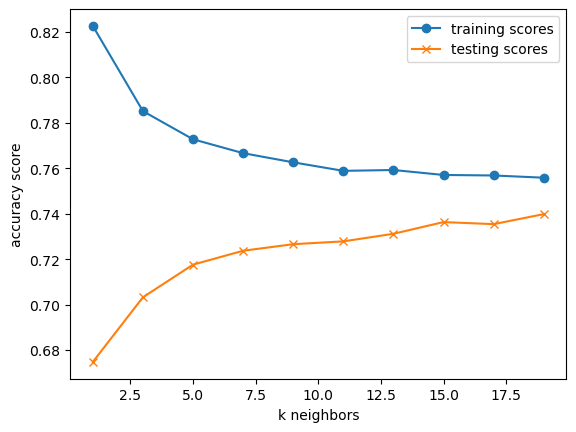

In [102]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
# We then plot the results of the testing and training scores to find the best k value without too much overfitting

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_encoded_init, y_train_init)
    train_score = knn.score(x_train_encoded_init, y_train_init)
    test_score = knn.score(x_test_encoded_init, y_test_init)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

#### Final

k: 1, Train/Test Score: 0.915/0.664
k: 3, Train/Test Score: 0.816/0.699
k: 5, Train/Test Score: 0.790/0.714
k: 7, Train/Test Score: 0.780/0.723
k: 9, Train/Test Score: 0.774/0.731
k: 11, Train/Test Score: 0.767/0.733
k: 13, Train/Test Score: 0.765/0.736
k: 15, Train/Test Score: 0.762/0.739
k: 17, Train/Test Score: 0.761/0.742
k: 19, Train/Test Score: 0.760/0.743


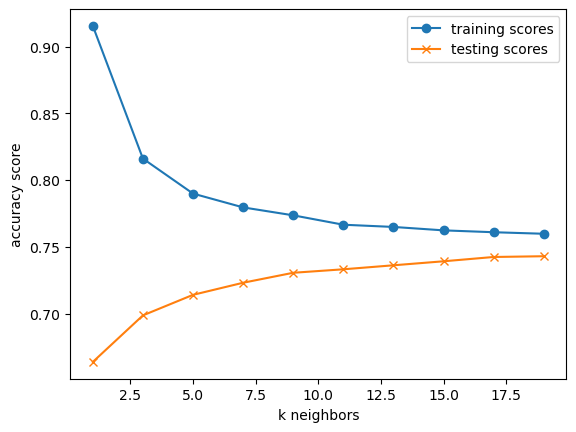

In [103]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
# We then plot the results of the testing and training scores to find the best k value without too much overfitting

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_encoded, y_train)
    train_score = knn.score(x_train_encoded, y_train)
    test_score = knn.score(x_test_encoded, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

### 2. Logistic Regression

#### Initial

In [104]:
#Create and fit the logistic regression model
logistic_regression_model = LogisticRegression(random_state=1, max_iter=1000)
logistic_regression_model.fit(x_train_encoded_init, y_train_init)

#make and save testing predictions with the saved logistic regression model using the test data
predictions = logistic_regression_model.predict(x_test_encoded_init)

# Review and display the accuracy of the logistic regression model
accuracy_lgr_init = accuracy_score(y_test_init, predictions)
print(f"Accuracy for (Initial) Logistic Regression Model is: {accuracy_lgr_init}")

Accuracy for (Initial) Logistic Regression Model is: 0.751145815650993


#### Final

In [106]:
# Create and fit the logistic regression model
logistic_regression_model = LogisticRegression(random_state=1, max_iter=1000)
logistic_regression_model.fit(x_train_encoded, y_train)

# make and save testing predictions with the saved logistic regression model using the test data
predictions = logistic_regression_model.predict(x_test_encoded)

# Review and display the accuracy of the logistic regression model
accuracy_lgr = accuracy_score(y_test, predictions)
print(f"Accuracy for Logistic Regression Model is: {accuracy_lgr}")


Accuracy for Logistic Regression Model is: 0.7522209019408137


### 3. Decision Tree

#### Initial

In [107]:
# create and fit the decision tree model
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(x_train_encoded_init, y_train_init)

# make and save testing predictions with the saved decision tree model using the test data
predictions = tree_model.predict(x_test_encoded_init)

# Review and display the accuracy of the decision tree model
accuracy_dt_init = accuracy_score(y_test_init, predictions)
print(f"Accuracy for (Initial) Decision Tree Model is: {accuracy_dt_init}")

Accuracy for (Initial) Decision Tree Model is: 0.6904317320205964


#### Final

In [108]:
# create and fit the decision tree model
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(x_train_encoded, y_train)

# make and save testing predictions with the saved decision tree model using the test data
predictions = tree_model.predict(x_test_encoded)

# Calculate the accuracy score
accuracy_dt = accuracy_score(y_test, predictions)
print(f"Accuracy for Decision Tree Model is: {accuracy_dt}")

Accuracy for Decision Tree Model is: 0.6699485090250665


### 4. Random Forest

#### Initial

In [115]:
# create and train the Random Forest model. Then create predictions for the model
clf = RandomForestClassifier(random_state=1, n_estimators=1000).fit(x_train_encoded_init, y_train_init)
predictions = clf.predict(x_test_encoded)

# Evaluate the model and its confusion matrix
print(f'Training Score for (Initial) Random Forest is: {clf.score(x_train_encoded_init, y_train_init)}')
print(f'Testing Score for (Initial) Random Forest is: {clf.score(x_test_encoded_init, y_test_init)}')

print(confusion_matrix(y_test_init, predictions, labels=[1, 0]))
print(classification_report(y_test_init, predictions, labels=[1, 0]))

Training Score for (Initial) Random Forest is: 0.857673664158132
Testing Score for (Initial) Random Forest is: 0.722118485825836
[[6718 2108]
 [2875 5972]]
              precision    recall  f1-score   support

           1       0.70      0.76      0.73      8826
           0       0.74      0.68      0.71      8847

    accuracy                           0.72     17673
   macro avg       0.72      0.72      0.72     17673
weighted avg       0.72      0.72      0.72     17673



#### Final

In [116]:
# create and train the Random Forest model. Then create predictions for the model
clf = RandomForestClassifier(random_state=1, n_estimators=1000).fit(x_train_encoded, y_train)
predictions = clf.predict(x_test_encoded)

# Evaluate the model and its confusion matrix
print(f'Training Score for Random Forest is: {clf.score(x_train_encoded, y_train)}')
print(f'Testing Score for Random Forest is: {clf.score(x_test_encoded, y_test)}')
print(confusion_matrix(y_test, predictions, labels=[1, 0]))
print(classification_report(y_test, predictions, labels=[1, 0]))



Training Score for Random Forest is: 0.930175974650597
Testing Score for Random Forest is: 0.7231369886267187
[[6616 2210]
 [2683 6164]]
              precision    recall  f1-score   support

           1       0.71      0.75      0.73      8826
           0       0.74      0.70      0.72      8847

    accuracy                           0.72     17673
   macro avg       0.72      0.72      0.72     17673
weighted avg       0.72      0.72      0.72     17673



### 5. XG Boosting

#### Initial

In [111]:
# create the XGB model
xgb_model = XGBClassifier(random_state=1, learning_rate = 0.05, n_estimators = 1000, max_depth=3)

# fit the XGB model to the training data and then create predictions
xgb_model.fit(x_train_encoded_init, y_train_init)
predictions = xgb_model.predict(x_test_encoded_init)

# get the accuracy score of the model, and the confusion matrix for the model
accuracy_xgb_init = accuracy_score(y_test_init, predictions)
print(f"Accuracy for (Initial) XGBoost Model is: {accuracy_xgb_init}")
print(confusion_matrix(y_test_init, predictions, labels=[1, 0]))
print(classification_report(y_test_init, predictions, labels=[1, 0]))

Accuracy for (Initial) XGBoost Model is: 0.753465738697448
[[7012 1814]
 [2543 6304]]
              precision    recall  f1-score   support

           1       0.73      0.79      0.76      8826
           0       0.78      0.71      0.74      8847

    accuracy                           0.75     17673
   macro avg       0.76      0.75      0.75     17673
weighted avg       0.76      0.75      0.75     17673



#### Final

In [ ]:
# create the XGB model
xgb_model = XGBClassifier(random_state=1, learning_rate = 0.05, n_estimators = 1000, max_depth=3)

# fit the XGB model to the training data and then create predictions
xgb_model.fit(x_train_encoded, y_train)
predictions = xgb_model.predict(x_test_encoded)

# get the accuracy score of the model, and the confusion matrix for the model
accuracy_xgb = accuracy_score(y_test, predictions)
print(f"Accuracy for XGBoost Model is: {accuracy_xgb}")
print(confusion_matrix(y_test, predictions, labels=[1, 0]))
print(classification_report(y_test, predictions, labels=[1, 0]))

Accuracy for XGBoost Model is: 0.7562949131443445
[[7044 1782]
 [2525 6322]]
              precision    recall  f1-score   support

           1       0.74      0.80      0.77      8826
           0       0.78      0.71      0.75      8847

    accuracy                           0.76     17673
   macro avg       0.76      0.76      0.76     17673
weighted avg       0.76      0.76      0.76     17673



### 6. Adaptive Boosting

#### Initial

In [113]:
# create the adaptive boosting model and fit to the training data
model_adapt = AdaBoostClassifier()
model_adapt.fit(x_train_encoded_init, y_train_init)

# get the accuracy score of the model, and the confusion matrix for the model
print(f"Training Accuracy for (Initial) Adaptive Boosting Classifier: {model_adapt.score(x_train_encoded_init, y_train_init)}")
print(f"Testing Accuracy for (Initial) Adaptive Boosting Classifier: {model_adapt.score(x_test_encoded_init, y_test_init)}")

c:\Users\Sami\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy for Adaptive Boosting Classifier: 0.7449027707048417
Testing Accuracy Adaptive Boosting Classifier: 0.7526735698523171


#### Final

In [ ]:
# create the adaptive boosting model and fit to the training data
model_adapt = AdaBoostClassifier()
model_adapt.fit(x_train_encoded, y_train)

# get the accuracy score of the model, and the confusion matrix for the model
print(f"Training Accuracy for Adaptive Boosting Classifier: {model_adapt.score(x_train_encoded, y_train)}")
print(f"Testing Accuracy for Adaptive Boosting Classifier: {model_adapt.score(x_test_encoded, y_test)}")

c:\Users\Sami\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy for Adaptive Boosting Classifier: 0.7464116637431865
Testing Accuracy Adaptive Boosting Classifier: 0.7507497312284276


From the above models and their confusion matrices, we can conclude that our best models were 

## Fine tuning the models, finding the best parameters/models

Finally, we will explore the best parameters for our models shown above using the GridSearch method. We will only use our final result models

### 1. Grid search on KNN

In [34]:
# Create the parameter grid for the GridSearchCV model running KNeighborsClassifier
param_grid_knn = {
    'n_neighbors': [19], 
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# create the grid_tuned model and the grid search estimator
grid_model_knn = KNeighborsClassifier()
grid_clf_knn = GridSearchCV(grid_model_knn, param_grid_knn, verbose=3)

# Fit the model by using the grid search estimator.
# This will take the KNN model and try each combination of parameters.
grid_clf_knn.fit(x_train_encoded, y_train)


              precision    recall  f1-score   support

    negative       0.73      0.69      0.71      8847
    positive       0.71      0.75      0.73      8826

    accuracy                           0.72     17673
   macro avg       0.72      0.72      0.72     17673
weighted avg       0.72      0.72      0.72     17673



In [ ]:
# List the best parameters for this model
print(grid_clf_knn.best_params_)

# Print the classification report for the best model
grid_y_pred_knn = grid_clf_knn.predict(x_test_encoded)
print(classification_report(y_test, grid_y_pred_knn,
                            target_names=[1, 0]))

### 2. Grid Search on Logistic Regression

In [ ]:
# Create the parameter grid for the GridSearchCV model running logistic regression
param_grid_lgr = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'], 
    'max_iter': [100, 1000, 10000]
}

# create the grid_tuned model and the grid search estimator
grid_model_lgr = LogisticRegression()
grid_clf_lgr = GridSearchCV(grid_model_lgr, param_grid_lgr, verbose=3)

# Fit the model by using the grid search estimator.
# This will take the Logistic Regression model and try each combination of parameters.
grid_clf_lgr.fit(x_train_encoded, y_train)

In [ ]:
# List the best parameters for this dataset
print(grid_clf_lgr.best_params_)

# Print the classification report for the best model
grid_y_pred_lgr = grid_clf_lgr.predict(x_test_encoded)
print(classification_report(y_test, grid_y_pred_lgr,
                            target_names=[1, 0]))

### 3. Grid Search on Decision Tree

In [ ]:
# Create the parameter grid for the GridSearchCV model running logistic regression
param_grid_dt = {
    'max_depth': [None, 1, 2, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# create the grid_tuned model and the grid search estimator
grid_model_dt = DecisionTreeClassifier()
grid_clf_dt = GridSearchCV(grid_model_dt, param_grid_dt, verbose=3)

# Fit the model by using the grid search estimator.
# This will take the Logistic Regression model and try each combination of parameters.
grid_clf_dt.fit(x_train_encoded, y_train)

In [ ]:
# List the best parameters for this dataset
print(grid_clf_dt.best_params_)

# Print the classification report for the best model
grid_y_pred_dt = grid_clf_dt.predict(x_test_encoded)
print(classification_report(y_test, grid_y_pred_dt,
                            target_names=[1, 0]))

### 4. Grid Search on Random Forest

In [ ]:
# Create the parameter grid for the GridSearchCV model running Random Forest
param_grid_rf = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 7, 11] 
}

# create the grid_tuned model and the grid search estimator
grid_model_rf = RandomForestClassifier()
grid_clf_rf = GridSearchCV(grid_model_rf, param_grid_rf, verbose=3)

# Fit the model by using the grid search estimator.
# This will take the Random Forest model and try each combination of parameters.
grid_clf_rf.fit(x_train_encoded, y_train)

In [ ]:
# List the best parameters for this dataset
print(grid_clf_rf.best_params_)

# Print the classification report for the best model
grid_y_pred_rf = grid_clf_rf.predict(x_test_encoded)
print(classification_report(y_test, grid_y_pred_rf,
                            target_names=[1, 0]))

### 5. Grid Search on XGBoost

In [ ]:
# Create the parameter grid for the GridSearchCV model running XGB
param_grid_xgb = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 7, 11]  
}

# create the grid_tuned model and the grid search estimator
grid_model_xgb = XGBClassifier()
grid_clf_xgb = GridSearchCV(grid_model_xgb, param_grid_xgb, verbose=3)

# Fit the model by using the grid search estimator.
# This will take the XGBoost model and try each combination of parameters.
grid_clf_xgb.fit(x_train_encoded, y_train)

In [ ]:
# List the best parameters for this dataset
print(grid_clf_xgb.best_params_)

# Print the classification report for the best model
grid_y_pred_xgb = grid_clf_xgb.predict(x_test_encoded)
print(classification_report(y_test, grid_y_pred_xgb,
                            target_names=[1, 0]))

### 6. Grid Search on Adaptive Boost

In [ ]:
# Create the parameter grid for the GridSearchCV model running XGB
param_grid_ada = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'] 
}

# create the grid_tuned model and the grid search estimator
grid_model_ada = AdaBoostClassifier()
grid_clf_ada = GridSearchCV(grid_model_ada, param_grid_ada, verbose=3)

# Fit the model by using the grid search estimator.
# This will take the XGBoost model and try each combination of parameters.
grid_clf_ada.fit(x_train_encoded, y_train)

In [ ]:
# List the best parameters for this dataset
print(grid_clf_ada.best_params_)

# Print the classification report for the best model
grid_y_pred_ada = grid_clf_ada.predict(x_test_encoded)
print(classification_report(y_test, grid_y_pred_ada,
                            target_names=[1, 0]))

### Summary of Grid Search

## Graphs

# Note the below is old data used to verify everything

In [40]:
# Create the parameter object for the randomized search estimator.
# Try adjusting n_neighbors with values of 1 through 19. 
# Adjust leaf_size by using a range from 1 to 500.
# Include both uniform and distance options for weights.
param_grid = {
    'n_neighbors': [1, 5, 11, 15, 19],
    'weights': ['uniform', 'distance'],
    'leaf_size': [1, 100, 500]
}

random_clf = RandomizedSearchCV(random_tuned_model, param_grid, random_state=0, verbose=3)
random_clf.fit(x_train_encoded, y_train)
# List the best parameters for this dataset
print(random_clf.best_params_)
# Make predictions with the hypertuned model
random_tuned_pred = random_clf.predict(x_test_encoded)
# Calculate the classification report
print(classification_report(y_test, random_tuned_pred,
                            target_names=target_names))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END leaf_size=1, n_neighbors=5, weights=uniform;, score=0.716 total time=   7.3s
[CV 2/5] END leaf_size=1, n_neighbors=5, weights=uniform;, score=0.705 total time=   7.2s
[CV 3/5] END leaf_size=1, n_neighbors=5, weights=uniform;, score=0.714 total time=   7.0s
[CV 4/5] END leaf_size=1, n_neighbors=5, weights=uniform;, score=0.710 total time=   7.2s
[CV 5/5] END leaf_size=1, n_neighbors=5, weights=uniform;, score=0.714 total time=   7.2s
[CV 1/5] END leaf_size=500, n_neighbors=19, weights=uniform;, score=0.746 total time=   3.9s
[CV 2/5] END leaf_size=500, n_neighbors=19, weights=uniform;, score=0.732 total time=   3.9s
[CV 3/5] END leaf_size=500, n_neighbors=19, weights=uniform;, score=0.734 total time=   4.0s
[CV 4/5] END leaf_size=500, n_neighbors=19, weights=uniform;, score=0.729 total time=   3.8s
[CV 5/5] END leaf_size=500, n_neighbors=19, weights=uniform;, score=0.739 total time=   4.0s
[CV 1/5] END leaf_size=1

In [ ]:
# random forest fixer
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3,5,7]
}

grid_clf = GridSearchCV(grid_tuned_model, param_grid, verbose=3)
# Fit the model by using the grid search estimator.
# This will take the KNN model and try each combination of parameters.
grid_clf.fit(x_train_encoded, y_train)
# List the best parameters for this dataset
print(grid_clf.best_params_)
# Print the classification report for the best model
grid_y_pred = grid_clf.predict(x_test_encoded)
print(classification_report(y_test, grid_y_pred,
                            target_names=target_names))

In [41]:
# Create the parameter grid for the GridSearchCV model running Xgboost
param_grid = {
  #random_state=1, learning_rate=0.05, n_estimators=1000, max_depth=3
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 7, 11]
}
# Create the GridSearchCV model
grid_model = GridSearchCV(XGBClassifier(), param_grid, verbose=3)
# Fit the model
grid_model.fit(x_train_encoded, y_train)
# Make predictions
predictions = grid_model.predict(x_test_encoded)
# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
# Print the best parameters
print(grid_model.best_params_)
print(grid_model.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.753 total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.742 total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.747 total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.742 total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.748 total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=500;, score=0.757 total time=   0.4s
[CV 2/5] END learning_rate=0.05, max_depth=3, n_estimators=500;, score=0.744 total time=   0.4s
[CV 3/5] END learning_rate=0.05, max_depth=3, n_estimators=500;, score=0.748 total time=   0.3s
[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=500;, score=0.745 total time=   0.3s
[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=500;, score=0.7